# Hyperparameter tuning to avoid overfitting

## Load data

In [1]:
import pandas as pd

path = '../../../data/default_credit_card/output/simplified_features.csv'
df = pd.read_csv(path)
df

,Gender,Age,Married,YearsEmployed,Income,Approved
0,1,30,1,1.25,0,1
1,0,58,1,3.04,560,1
...,...,...,...,...,...,...
688,1,17,1,0.04,750,0
689,1,35,1,8.29,0,0


## Feature selection

In [2]:
target = 'Approved'

y = df[target]
X = df.drop(columns=target)

## Train test split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Modelling with default hyperparameters

DecisionTreeClassifier()

0.9958592132505176

0.6376811594202898

## Modelling with custom hyperparameters

DecisionTreeClassifier(max_depth=3)

0.7701863354037267

0.714975845410628

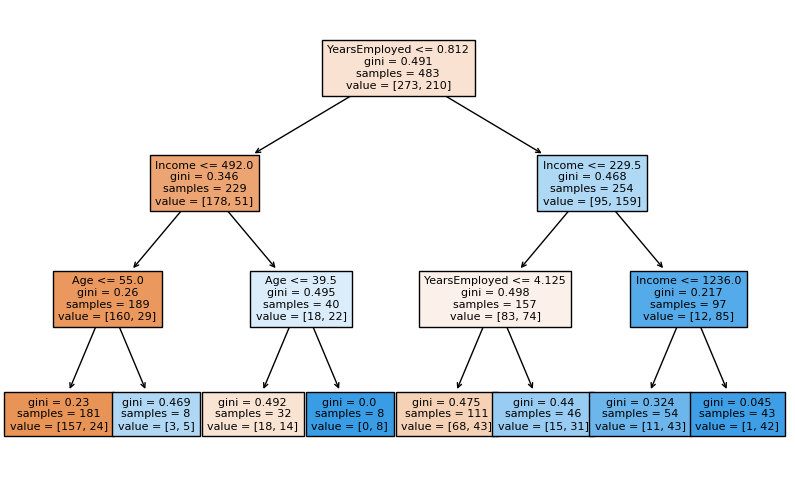

## Modelling with other custom hyperparameters

DecisionTreeClassifier(min_samples_leaf=50)

0.7494824016563147

0.7053140096618358

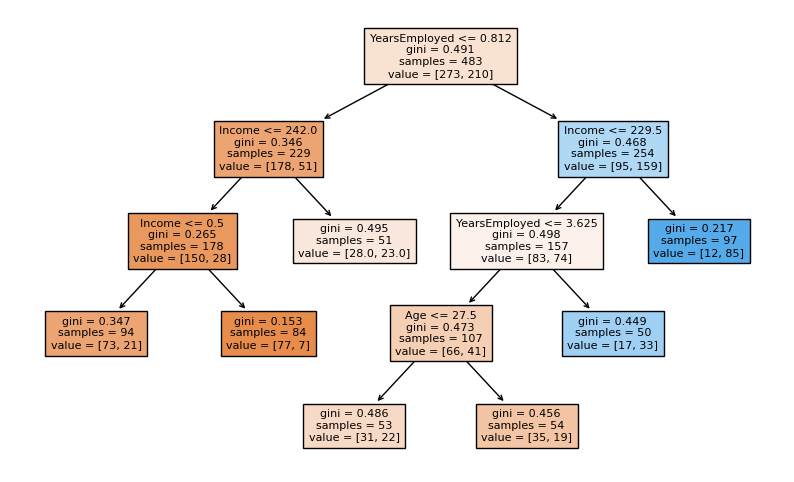

## Grid search to find the best hyperparameters

GridSearchCV.__init__() missing 2 required positional arguments: 'estimator' and 'param_grid'


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=200; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_sam

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [50, 100, 200, 500]},
             verbose=2)

{'max_depth': [3, 5, 7, 9],
 'min_samples_leaf': [50, 100, 200, 500],
 'criterion': ['gini', 'entropy']}

32

DecisionTreeClassifier(max_depth=3, min_samples_leaf=100)

0.7308419243986255

0.6811594202898551

## Grid search with other models

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.1s


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.1s


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.0s


[CV] END ...learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.1s


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.1s


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.1s


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.1s


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=200; total time=   0.2s


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=200; total time=   0.2s


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=200; total time=   0.3s


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=200; total time=   0.3s


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=200; total time=   0.2s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.0s


[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.1s


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.1s


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.1s


[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.1s


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.1s


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.1s


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   0.2s


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   0.2s


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   0.2s


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   0.2s


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   0.3s
[CV] END ......learning_rate=1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ......learning_rate=1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ......learning_rate=1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ......learning_rate=1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ......learning_rate=1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END .....learning_rate=1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END .....learning_rate=1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END .....learning_rate=1, max_depth=3, n_estimators=100; total time=   0.0s


[CV] END .....learning_rate=1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END .....learning_rate=1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END .....learning_rate=1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=3, n_estimators=200; total time=   0.1s


[CV] END .....learning_rate=1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ......learning_rate=1, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ......learning_rate=1, max_depth=5, n_estimators=50; total time=   0.0s


[CV] END ......learning_rate=1, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ......learning_rate=1, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ......learning_rate=1, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END .....learning_rate=1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=5, n_estimators=100; total time=   0.1s


[CV] END .....learning_rate=1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=5, n_estimators=100; total time=   0.1s


[CV] END .....learning_rate=1, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=5, n_estimators=200; total time=   0.1s


[CV] END .....learning_rate=1, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=5, n_estimators=200; total time=   0.1s


[CV] END .....learning_rate=1, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ......learning_rate=1, max_depth=7, n_estimators=50; total time=   0.1s
[CV] END ......learning_rate=1, max_depth=7, n_estimators=50; total time=   0.1s
[CV] END ......learning_rate=1, max_depth=7, n_estimators=50; total time=   0.1s


[CV] END ......learning_rate=1, max_depth=7, n_estimators=50; total time=   0.1s
[CV] END ......learning_rate=1, max_depth=7, n_estimators=50; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=100; total time=   0.1s


[CV] END .....learning_rate=1, max_depth=7, n_estimators=100; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=100; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=100; total time=   0.1s


[CV] END .....learning_rate=1, max_depth=7, n_estimators=100; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=200; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=200; total time=   0.1s


[CV] END .....learning_rate=1, max_depth=7, n_estimators=200; total time=   0.1s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=200; total time=   0.1s


[CV] END .....learning_rate=1, max_depth=7, n_estimators=200; total time=   0.1s


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

GradientBoostingClassifier(learning_rate=0.01)

0.7557774914089347

0.7342995169082126